In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression


1. Data Transformation:

Goal: Prepare the data for analysis by applying transformations.
Steps and Hints:
Normalization: Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.
Logarithmic Scaling (Optional): Apply logarithmic scaling if the data has a wide range of values. This can be done using np.log.
Fourier Transformation: Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.
Tools: Explore np.fft.fft for Fourier transformation.

In [2]:
# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [3]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [8]:
df = ninja_data

In [9]:
for column in df.columns:
    mean = df[column].mean()
    std = df[column].std()
    df[column] = (df[column] - mean) / std   #z score normalization

In [10]:
df.head()

,Time,Temperature,Pressure,Chemical Concentration
0,-1.729454,0.253054,1.444895,-0.206291
1,-1.725992,0.071093,1.468476,-0.187444
2,-1.722530,0.160811,1.375573,0.101064
3,-1.719067,0.346135,1.412122,0.004856
4,-1.715605,0.302714,1.420026,0.170552


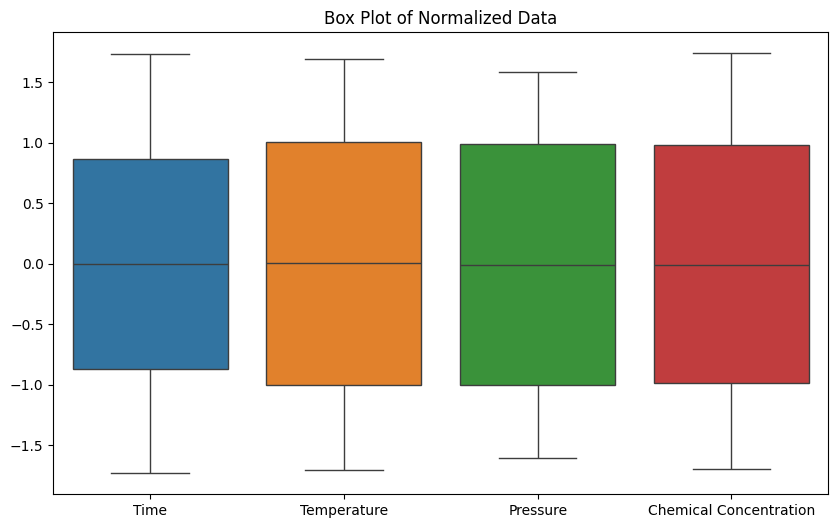

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Normalized Data')
plt.show()

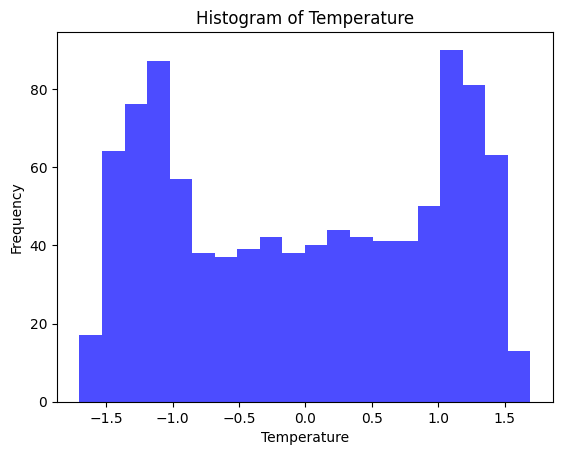

In [13]:
plt.hist(df['Temperature'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

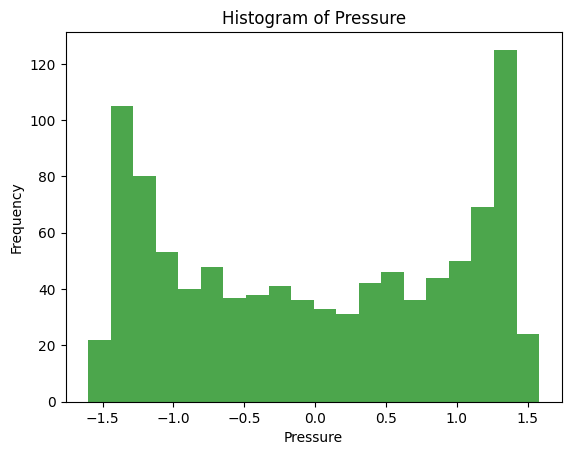

In [14]:
plt.hist(df['Pressure'], bins=20, color='green', alpha=0.7)
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.title('Histogram of Pressure')
plt.show()


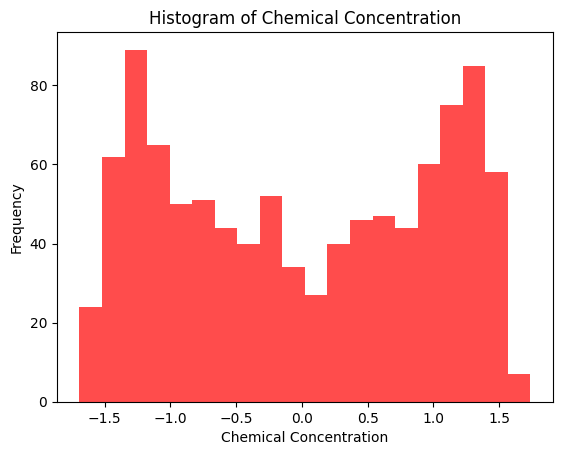

In [15]:
plt.hist(df['Chemical Concentration'], bins=20, color='red', alpha=0.7)
plt.xlabel('Chemical Concentration')
plt.ylabel('Frequency')
plt.title('Histogram of Chemical Concentration')
plt.show()

In [ ]:
#The data is normalized, and there are no strong variations. the need for logarithmic scaling is minimal

In [17]:
df['Temperature'].describe()

,Temperature
count,1.000000e+03
mean,2.273737e-16
std,1.000000e+00
min,-1.700716e+00
25%,-1.004320e+00
50%,8.753899e-03
75%,1.005051e+00
max,1.693152e+00


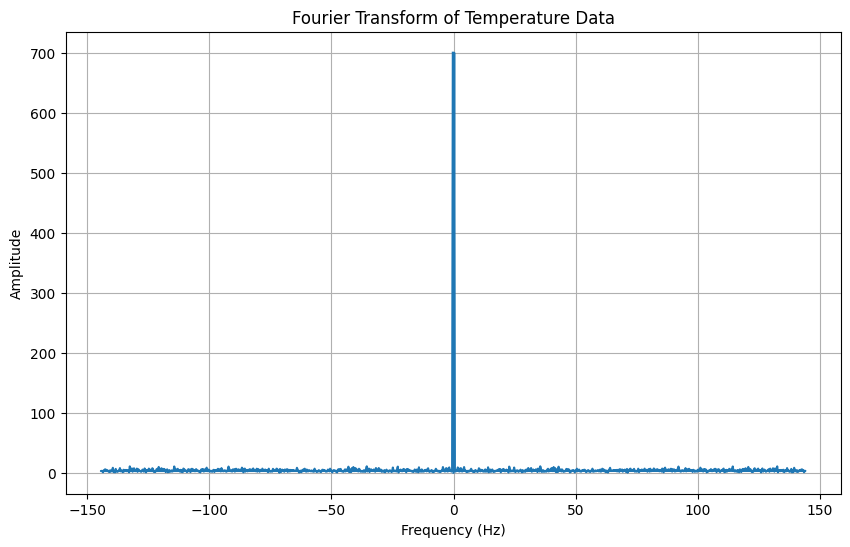

In [21]:
# FURIE
time = df['Time'].values
fs = 1 / np.mean(np.diff(time))

signal = df['Temperature'].values
signal_fft = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal), 1 / fs)

plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(signal_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Temperature Data')
plt.grid(True)



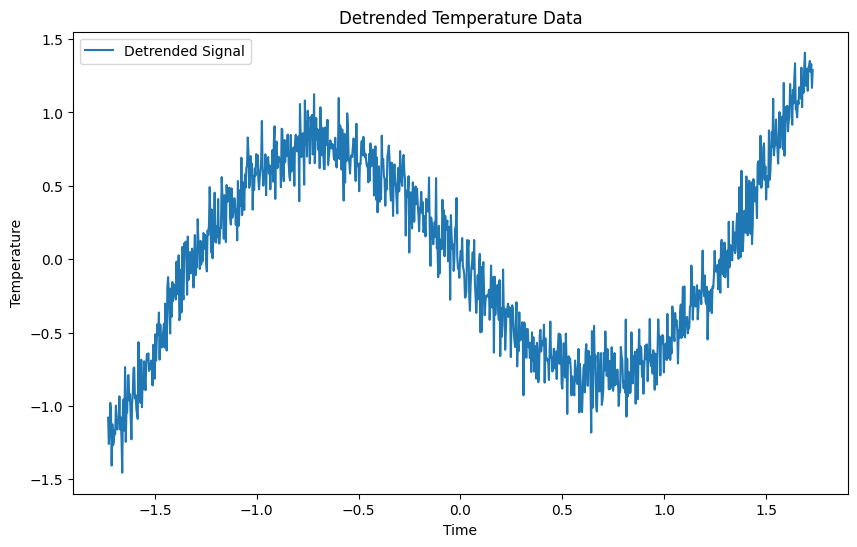

In [23]:
from scipy.signal import detrend
#delete the trend
signal_detrended = detrend(signal)

plt.figure(figsize=(10, 6))
plt.plot(time, signal_detrended, label='Detrended Signal')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Detrended Temperature Data')
plt.legend()

In [ ]:
#The graph shows regular undulating temperature changes. This may be due to cycling
#Some noise is also visible (irregular small fluctuations)

# 2. Statistical Analysis:

Goal: Extract statistical insights from the data.
Steps and Hints:
Descriptive Statistics: Use pandas describe() function to get an overview of the data.
Correlation Analysis: Calculate and interpret the correlation between variables using pandas corr() function.
Inferential Statistics: Consider conducting hypothesis tests or regression analysis to draw deeper insights.
Tools: Explore scipy.stats for advanced statistical functions.

In [24]:
df.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.684342e-17,2.273737e-16,1.421085e-17,-4.263256e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.729454e+00,-1.700716e+00,-1.601678e+00,-1.691915e+00
25%,-8.647271e-01,-1.004320e+00,-9.984525e-01,-9.841460e-01
50%,1.229485e-16,8.753899e-03,-5.819063e-03,-1.307186e-02
75%,8.647271e-01,1.005051e+00,9.876893e-01,9.803748e-01
max,1.729454e+00,1.693152e+00,1.579772e+00,1.738253e+00


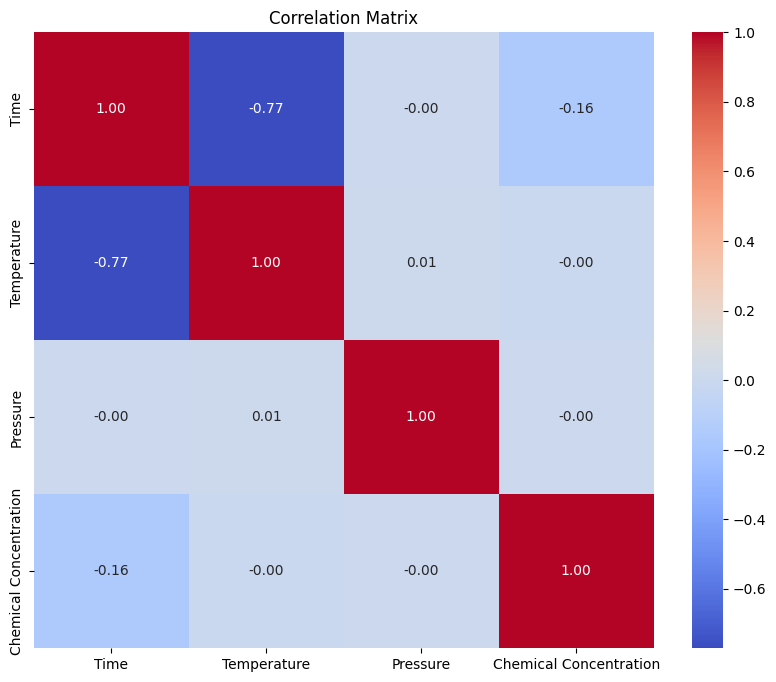

In [25]:
#Correlation
correlation_matrix = df.corr()  #use pierson corr
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Time and Temperature: Strong negative correlation (-0.77)
indicates that as time increases, temperature decreases significantly.

Temperature and Pressure: No significant correlation (0.01), suggesting no linear relationship between these variables.

Time and Chemical Concentration: Weak negative correlation (-0.16) indicates a slight inverse relationship.

Pressure with other variables:indicating no meaningful linear relationships.

Linear Regression Model: Temperature = -0.77 + 0.00


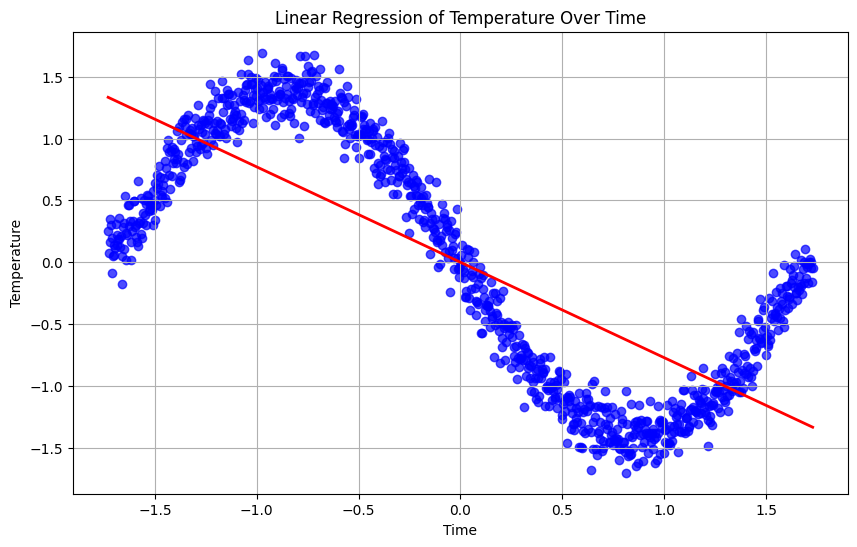

In [29]:
model = LinearRegression()
x = df[['Time']]
y = df['Temperature']
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_


print(f"Linear Regression Model: Temperature = {slope:.2f} + {intercept:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Temperature'], color='blue', alpha=0.7)
plt.plot(df['Time'], slope * df['Time'] + intercept, color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Linear Regression of Temperature Over Time')
plt.grid(True)
plt.show()

The data (blue dots) have a pronounced curve resembling a sinusoidal pattern

polynomial regression to describe nonlinear dependencies.

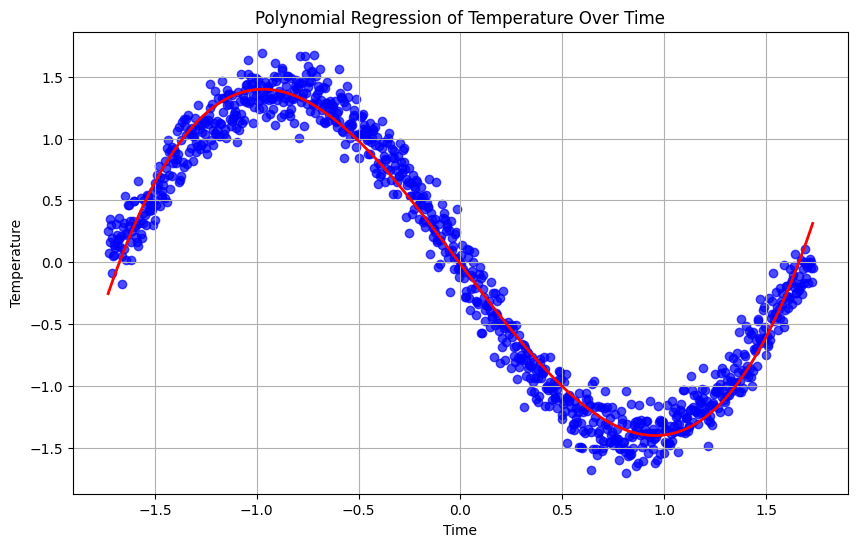

In [30]:
from numpy.polynomial.polynomial import Polynomial


coefs = Polynomial.fit(df['Time'],df['Temperature'], deg=3)
poly_fit = coefs(df['Time'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Temperature'], color='blue', alpha=0.7)
plt.plot(df['Time'], poly_fit, color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Polynomial Regression of Temperature Over Time')
plt.grid(True)
plt.show()


The model shows that the temperature increases, reaches a maximum, then decreases and begins to rise again

In [34]:
model = LinearRegression()
w = df[['Chemical Concentration']]
t = df['Temperature']

model.fit(w, t)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Model: Temperature = {slope:.2f} * Chemical Concentration + {intercept:.2f}")



Linear Regression Model: Temperature = -0.00 * Chemical Concentration + 0.00


There is practically no linear relationship between "Chemical Concentration" and "Temperature"

<Figure size 1000x600 with 0 Axes>

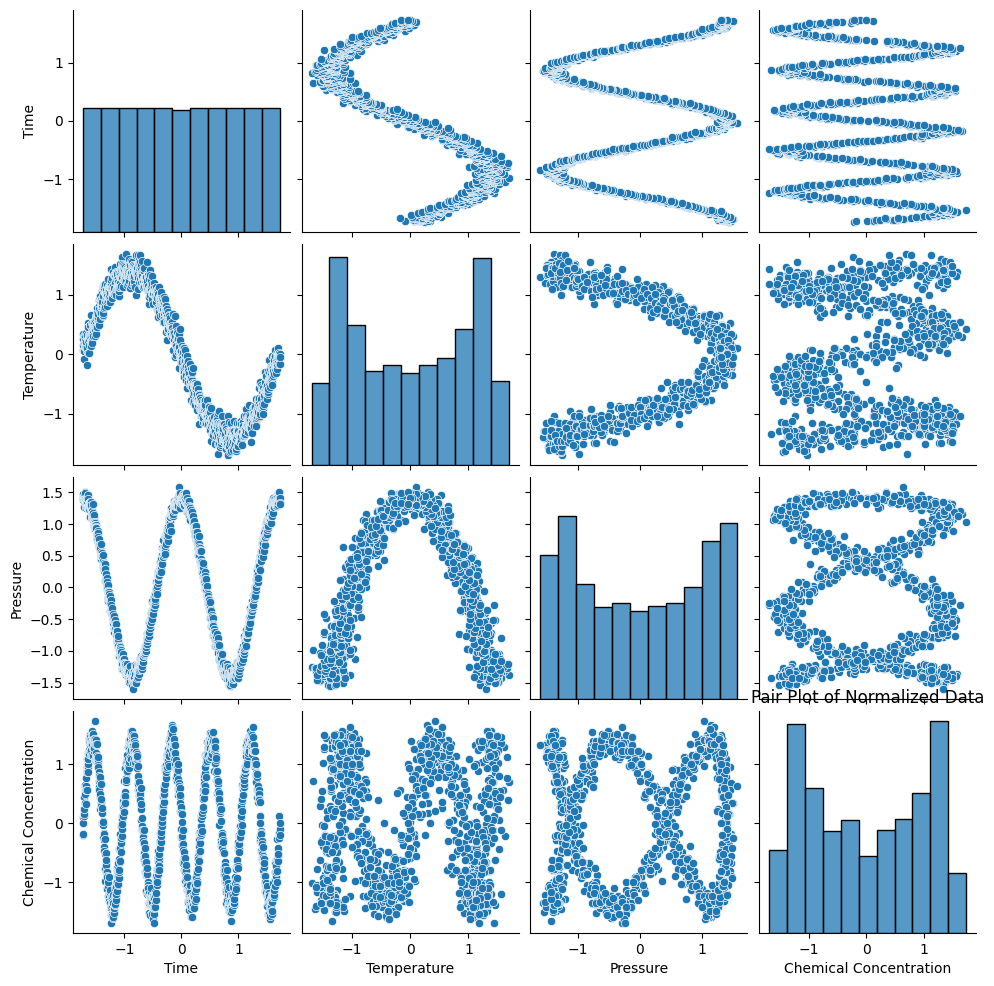

In [12]:
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.title('Pair Plot of Normalized Data')

plt.show()